# Chapter 6 - Exploring

In [2]:
# Basic Libraries

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
#sns.set_style("darkgrid")

import pandas as pd
import numpy as np

#import warnings
#warnings.filterwarnings("ignore")

### Dataset

The following columns are included in the dataset:

    • pclass - Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd)
    • survival - Survival (0 = No, 1 = Yes)
    • name - Name
    • sex - Sex
    • age - Age
    • sibsp - Number of siblings/spouses aboard
    • parch - Number of parents/children aboard
    • ticket - Ticket number
    • fare - Passenger fare
    • cabin - Cabin
    • embarked - Point of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
    • boat - Lifeboat
    • body - Body identification number
    • home.dest - Home/destination

In [5]:
url = ("https://raw.githubusercontent.com/joanby/python-ml-course/refs/heads/master/datasets/titanic/titanic3.csv")
df = pd.read_csv(url)
orig_df = df
orig_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Here is a summary of all dataset treatments; for more details, see MLPR 01 and MLPR 02.

In [7]:
from sklearn import model_selection 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer  
from sklearn.preprocessing import StandardScaler 

def tweak_titanic(df):
    # Drop unnecessary columns and convert categorical columns to dummy variables
    df = df.drop(
        columns=[
            "name",          # Drop passenger name column
            "ticket",        # Drop ticket column
            "home.dest",     # Drop home destination column
            "boat",          # Drop boat information column
            "body",          # Drop body number column
            "cabin",         # Drop cabin information column
        ]
    ).pipe(pd.get_dummies, drop_first=True)  # Convert categorical variables to dummy variables, dropping the first category
    return df                                # Return the cleaned and transformed DataFrame

def get_train_test_X_y(
    df, y_col, size=0.3, std_cols=None
):
    y = df[y_col]               # Extract the target variable
    X = df.drop(columns=y_col)  # Drop target variable from feature set
    
    X_train, X_test, y_train, y_test = model_selection.train_test_split(   # Split data into training and test sets
        X, y, test_size=size, random_state=42
    )
    cols = X.columns  # Get list of feature columns
    
    num_cols = [      # List of numeric columns to impute for missing values
        "pclass",
        "age",
        "sibsp",
        "parch",
        "fare",
    ]
    fi = IterativeImputer()                       # Initialize IterativeImputer for imputing missing values
    fitted = fi.fit_transform(X_train[num_cols])  # Fit and transform imputer on training numeric columns
    
    # Update training DataFrame with imputed values for numeric columns
    X_train = X_train.assign(**{c: fitted[:, i] for i, c in enumerate(num_cols)})
    test_fit = fi.transform(X_test[num_cols])  # Transform test data using the same imputer
    
    # Update test DataFrame with imputed values for numeric columns
    X_test = X_test.assign(**{c: test_fit[:, i] for i, c in enumerate(num_cols)})
    
    # Standardize specified columns if any are provided
    if std_cols:
        std = StandardScaler()  # Initialize StandardScaler
        fitted = std.fit_transform(X_train[std_cols])  # Fit and transform scaler on training standardization columns
        # Update training DataFrame with standardized values
        X_train = X_train.assign(**{c: fitted[:, i] for i, c in enumerate(std_cols)})
        test_fit = std.transform(X_test[std_cols])     # Transform test data using the same scaler
        # Update test DataFrame with standardized values
        X_test = X_test.assign(**{c: test_fit[:, i] for i, c in enumerate(std_cols)})

    # Return training and test sets for features and target
    return X_train, X_test, y_train, y_test

# Apply the functions to preprocess the Titanic dataset
ti_df = tweak_titanic(orig_df)                 # Clean and transform the original DataFrame
std_cols = "pclass,age,sibsp,fare".split(",")  # Specify columns to standardize

# Split the preprocessed data into training and test sets
X_train, X_test, y_train, y_test = get_train_test_X_y(
    ti_df, "survived", std_cols=std_cols
)

# Concatenate training and test sets for features and target variables for further use
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [8]:
X.shape

(1309, 8)

In [9]:
X.head()

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
1214,0.825248,-0.167248,-0.498616,0.0,-0.473625,True,False,True
677,0.825248,-0.205255,-0.498616,0.0,-0.488146,True,False,True
534,-0.363317,-0.751526,-0.498616,0.0,-0.145246,False,False,True
1174,0.825248,-2.153148,6.897852,2.0,0.679608,False,False,True
864,0.825248,-0.049178,-0.498616,0.0,-0.490434,False,False,True


In [10]:
# Summarize specific columns
X.describe().iloc[:, [0, -1]]

,pclass,fare
count,1309.000000,1309.000000
mean,-0.012831,-0.007599
std,0.995822,0.980143
min,-1.551881,-0.704310
25%,-0.363317,-0.488146
50%,0.825248,-0.363928
75%,0.825248,-0.045335
max,0.825248,9.066014


In [11]:
# Select rows at index positions 1 and 4, retrieving the last 3 columns of the DataFrame 'X'
X.iloc[[1, 4], -3:]

,sex_male,embarked_Q,embarked_S
677,True,False,True
864,False,False,True


In [12]:
# Select rows with index labels 677 and 864, retrieving all columns starting from 'sex_male' to the end of the DataFrame 'X'
X.loc[[677, 864], "sex_male":]

,sex_male,embarked_Q,embarked_S
677,True,False,True
864,False,False,True


### Histogram

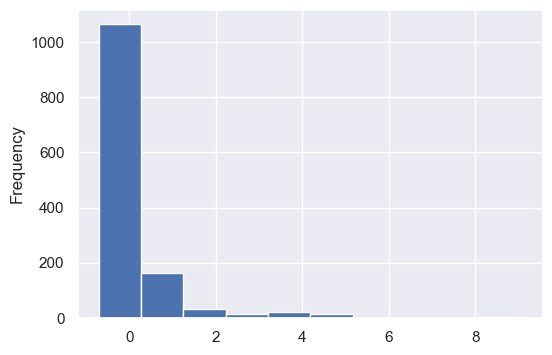

In [14]:
fig, ax = plt.subplots(figsize=(6, 4))         # Create a figure and an axis with specified dimensions (6x4 inches)
X.fare.plot(kind="hist", ax=ax);               # Plot a histogram of the 'fare' column in DataFrame 'X' on the created axis

#fig.savefig("images/mlpr_0601.png", dpi=300)  # (Optional) Save the figure as a .png file with a resolution of 300 dpi

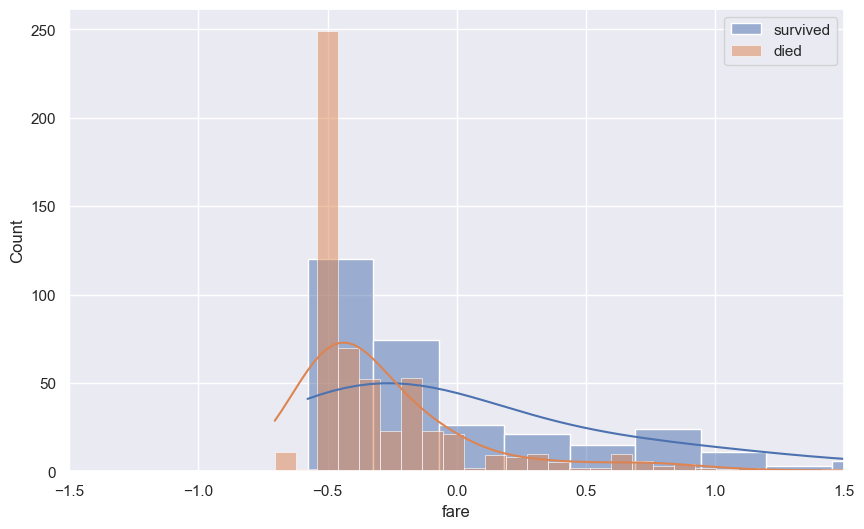

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))                           # Create a figure and axis with dimensions 10x6 inches
mask = y_train == 1                                               # Create a mask to filter rows where 'y_train' indicates survival (value 1)
ax = sns.histplot(X_train[mask].fare, kde=True, label='survived') # Plot the distribution of 'fare' for those who survived, with KDE curve
ax = sns.histplot(X_train[~mask].fare, kde=True, label='died')    # Plot the distribution of 'fare' for those who did not survive, with KDE curve
ax.set_xlim(-1.5, 1.5)                                            # Set the x-axis limits to focus on the range from -1.5 to 1.5
ax.legend();                                                      # Display the legend to differentiate 'survived' and 'died' distributions

# fig.savefig('images/mlpr_0602.png', dpi=300, bbox_inches='tight')  # (Optional) Save the figure as a .png file with 300 dpi resolution, 
                                                                     # and adjust the bounding box to fit tightly

### Scatter Plot

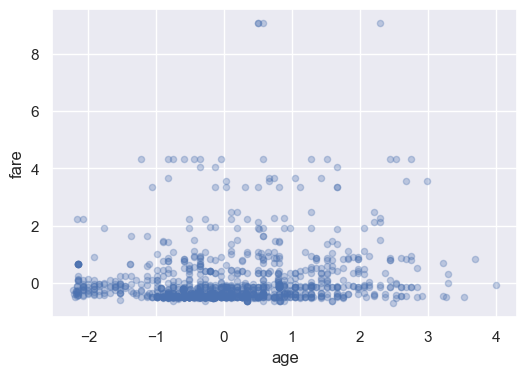

In [17]:
fig, ax = plt.subplots(figsize=(6, 4))  # Create a figure and axis with dimensions 6x4 inches

X.plot.scatter(                         # Plot a scatter plot from DataFrame 'X'
    x="age", y="fare", ax=ax,           # Specify 'age' as x-axis and 'fare' as y-axis, using the created axis
    alpha=0.3                           # Set transparency level of points to 0.3 for better visualization
);
#fig.savefig("images/mlpr_0603.png", dpi=300)  # (Optional) Save the figure as a .png file with 300 dpi resolution

There doesn’t appear to be much correlation between these two
features. We can do Pearson correlation between two (pandas)
columns with the .corr method to quantify the correlation:

In [19]:
X.age.corr(X.fare)

0.17719974839989594

### Joint Plot

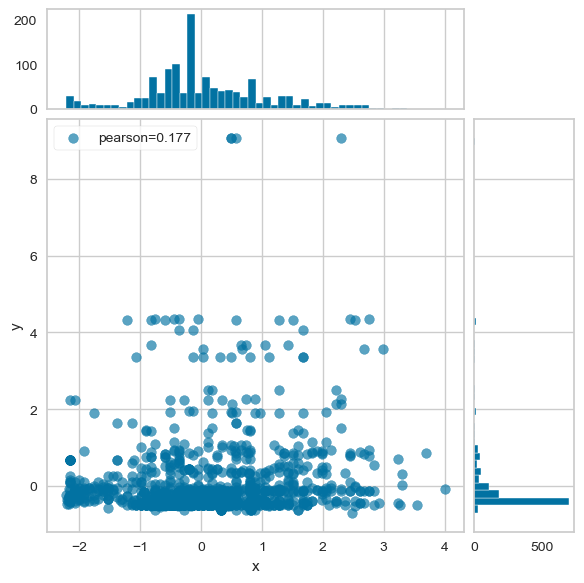

In [21]:
# Drop rows with NaNs in 'age' or 'fare' columns
X_clean = X.dropna(subset=['age', 'fare'])

# Now, use the JointPlotVisualizer with the cleaned data
from yellowbrick.features import JointPlotVisualizer

fig, ax = plt.subplots(figsize=(6, 6))                   # Create a figure and axis with a size of 6x6 inches
jpv = JointPlotVisualizer(feature="age", target="fare")  # Initialize a JointPlotVisualizer to analyze the relationship between 'age' and 'fare'
jpv.fit(X_clean["age"], X_clean["fare"])                 # Fit the visualizer on the cleaned 'age' and 'fare' data from the DataFrame
jpv.poof();                                              # Render the plot
# fig.savefig("images/mlpr_0604.png", dpi=300)           # (Optional) Save the plot as a .png image with 300 dpi resolution

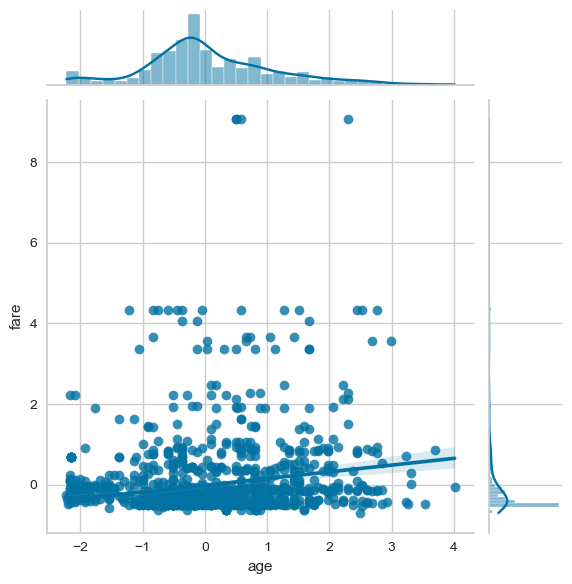

In [22]:
from seaborn import jointplot

new_df = X.copy()                        # Copy X DataFrame to avoid modifying the original data
new_df["target"] = y                     # Add 'target' column from y to new_df

p = jointplot(x="age", y="fare", data=new_df, kind="reg")  # Specify x, y, and data with keyword arguments

# p.fig.savefig("images/mlpr_0605.png", dpi=300)           # (Optional) Save the plot as a .png image with 300 dpi resolution

### Pair Grid

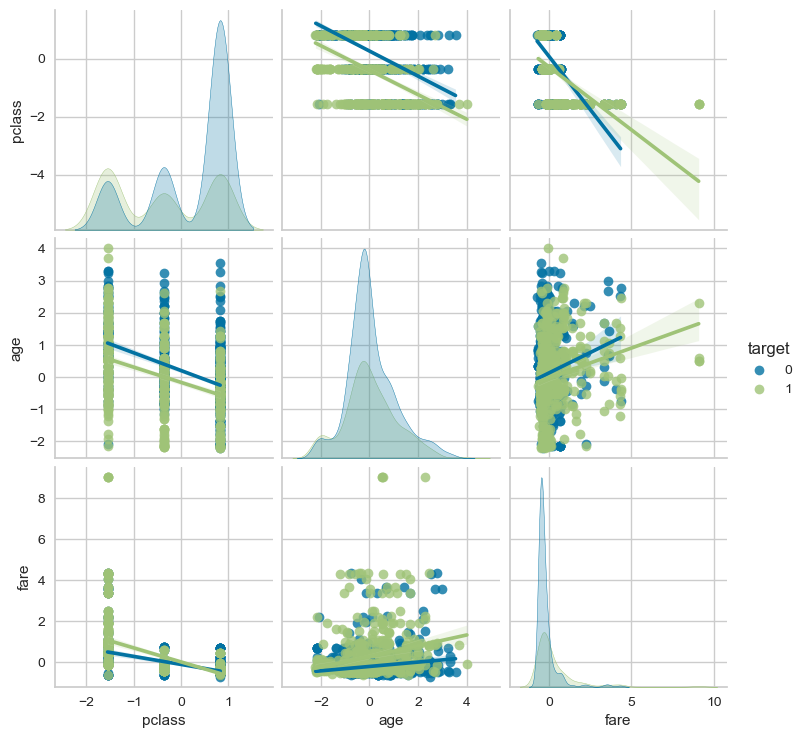

In [24]:
from seaborn import pairplot      

new_df = X.copy()                 # Copy the DataFrame X to avoid modifying the original data
new_df["target"] = y              # Add 'target' column from y to the copied DataFrame

vars = ["pclass", "age", "fare"]  # Define the list of variables to plot

p = pairplot(                     # Create a pairplot with the specified variables and settings
    new_df,                       # Data source for the plot
    vars=vars,                    # Specify variables to include in the pairplot
    hue="target",                 # Color code the plots based on the 'target' column
    kind="reg"                    # Use regression lines in the scatter plots
)
# p.fig.savefig("images/mlpr_0606.png", dpi=300)  # (Optional) Save the plot as a .png image with 300 dpi resolution

### Box and Violin Plots

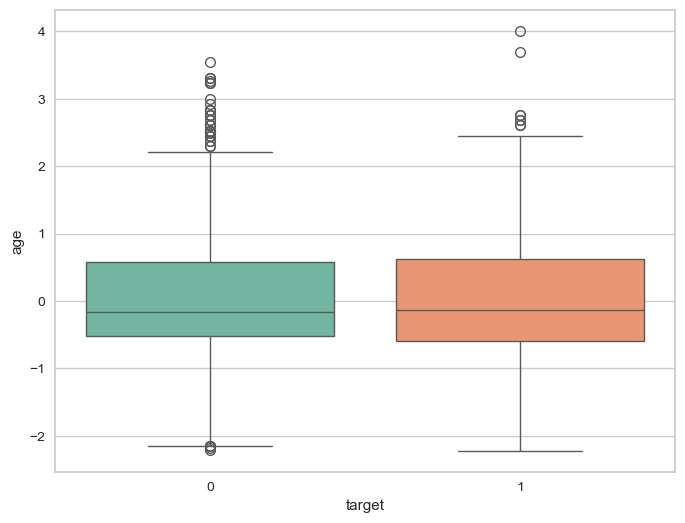

In [26]:
from seaborn import boxplot 

fig, ax = plt.subplots(figsize=(8, 6))  # Create a figure and axis with a size of 8x6 inches
new_df = X.copy()                       # Create a copy of the feature DataFrame X
new_df["target"] = y                    # Add the target variable 'y' as a new column in new_df for grouping

# Create a box plot for 'age' across different 'target' values, adding hue and disabling legend for better compatibility
boxplot(
    x="target",        # Set 'target' as the categorical x-axis (survival groups)
    y="age",           # Set 'age' as the numeric y-axis variable
    data=new_df,       # Provide the DataFrame for plotting
    palette="Set2",    # Apply a distinct color palette ('Set2') to each 'target' category
    hue="target",      # Use 'target' as the hue variable to assign colors to each category
    legend=False,      # Disable the legend to prevent duplication
    ax=ax              # Use the previously created axis
);

# fig.savefig("images/mlpr_0607.png", dpi=300)      # Optional: Save the figure as a .png image with 300 dpi resolution

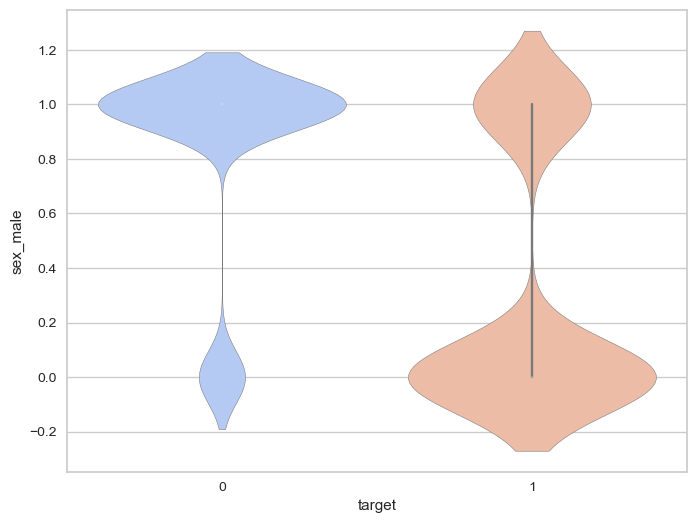

In [27]:
from seaborn import violinplot

fig, ax = plt.subplots(figsize=(8, 6))  # Create a figure and axis with dimensions 8x6 inches
new_df = X.copy()                       # Create a copy of the feature DataFrame X
new_df["target"] = y                    # Add the target variable 'y' as a new column for grouping

# Create a violin plot to show the distribution of 'sex_male' across different 'target' values
violinplot(
    x="target",               # Set 'target' as the categorical x-axis (survival groups)
    y="sex_male",             # Set 'sex_male' as the numeric y-axis variable
    hue="target",             # Use 'target' as the hue to color the violin plots
    data=new_df,              # Provide the DataFrame containing data for plotting
    palette="coolwarm",       # Use a 'coolwarm' color palette to make the plot colorful
    legend=False,             # Disable the legend if it's redundant
    ax=ax                     # Use the previously created axis for plotting
);

# fig.savefig("images/mlpr_0608.png", dpi=300)         # Optional: Save the figure as a .png image with 300 dpi resolution

### Comparing Two Ordinal Values

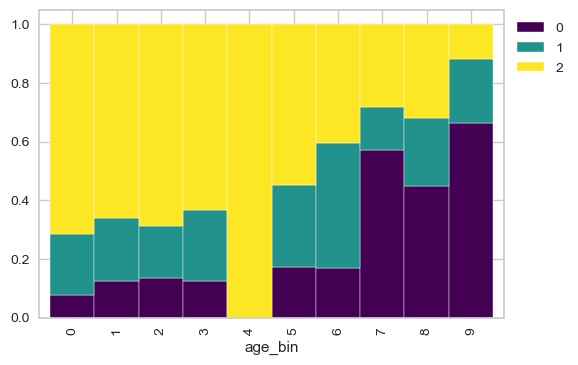

In [29]:
fig, ax = plt.subplots(figsize=(6, 4))     # Create a figure and axis with dimensions 6x4 inches

(
    X.assign(                              # Use assign to add new columns to the DataFrame X without altering the original data
        age_bin=pd.qcut(                   # Bin 'age' into 10 equal-sized quantiles, assigning bin labels 0-9
            X.age, q=10, labels=False
        ),
        class_bin=pd.cut(                  # Bin 'pclass' into 3 equal-width bins, assigning bin labels 0-2
            X.pclass, bins=3, labels=False
        ),
    )
    .groupby(["age_bin", "class_bin"])           # Group the data by 'age_bin' and 'class_bin' columns
    .size()                                      # Count the occurrences for each group
    .unstack()                                   # Convert 'class_bin' values into separate columns for a bar plot
    .pipe(lambda df: df.div(df.sum(1), axis=0))  # Normalize counts to show relative proportions by row
    .plot.bar(             # Create a stacked bar plot to show distributions across bins
        stacked=True,      # Stack the bars to show cumulative proportions within each age_bin
        width=1,           # Set the width of bars to fill the available space
        ax=ax,             # Use the previously defined axis for plotting
        cmap="viridis",    # Apply a colormap to give each class_bin a distinct color
    )
    .legend(bbox_to_anchor=(1, 1))  # Position the legend outside the plot for clarity
);

# Optional: Save the figure as an image with 300 dpi resolution and tight bounding box
# fig.savefig("image/mlpr_0609.png", dpi=300, bbox_inches="tight")

### Correlation

Yellowbrick can create pairwise comparisons between the features. This plot shows a Pearson correlation
(the algorithm parameter also accepts 'spearman' and
'covariance'):

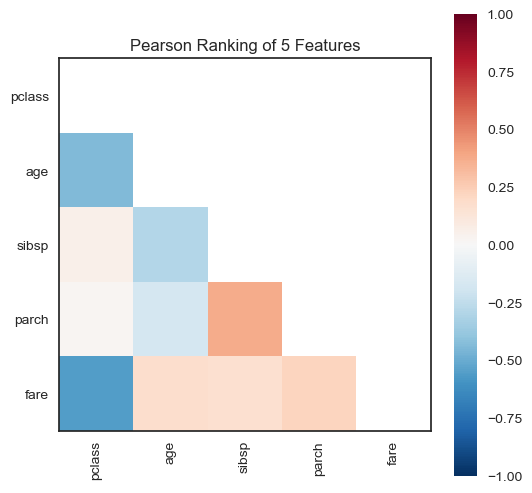

In [32]:
from yellowbrick.features import Rank2D
import numpy as np

sns.set_style("white")

# Ensure no NaNs by checking only numeric columns and dropping any rows with NaNs in them
X_clean = X.select_dtypes(include=[np.number]).dropna()

# Recheck to confirm if there are still any NaN values left
if X_clean.isnull().values.any():
    print("Warning: NaNs are still present in X_clean.")
else:
    fig, ax = plt.subplots(figsize=(6, 6))                       # Set up figure and axes with size 6x6 inches
    pcv = Rank2D(features=X_clean.columns, algorithm="pearson")  # Initialize Rank2D visualizer with Pearson correlation
    pcv.fit(X_clean, y)                                          # Fit the Rank2D visualizer to the clean numeric data
    pcv.transform(X_clean)                                       # Apply transformation to calculate correlation
    pcv.poof();                                                  # Display the visualization
    
    # fig.savefig("images/mlpr_0610.png", dpi=300, bbox_inches="tight")  # Optionally save the figure

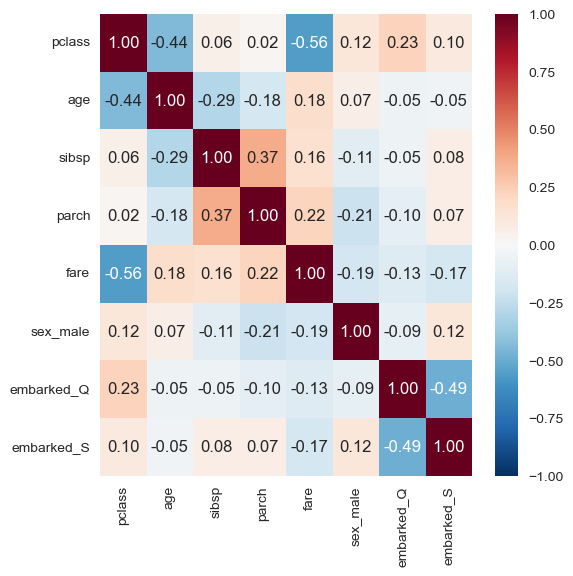

In [33]:
from seaborn import heatmap  # Import the heatmap function from Seaborn for correlation matrix visualization

fig, ax = plt.subplots(figsize=(6, 6))  # Create a figure and axis with dimensions 6x6 inches
ax = heatmap(                           # Generate a heatmap to display the correlation matrix of features in X
    X.corr(),                           # Compute the correlation matrix for the DataFrame X
    fmt=".2f",                          # Format the annotation text to 2 decimal places
    annot=True,                         # Annotate each cell in the heatmap with its correlation value
    ax=ax,                              # Use the specified axis for the plot
    cmap="RdBu_r",                      # Set the color palette to 'RdBu_r' (red to blue, reversed)
    vmin=-1,                            # Set the minimum value of the color scale to -1 (strong negative correlation)
    vmax=1,                             # Set the maximum value of the color scale to 1 (strong positive correlation)
)
# fig.savefig("images/mlpr_0611.png", dpi=300, bbox_inches="tight")  # (Optional) Save the figure as an image with 300 dpi, 
                                                                     # adjusting the bounding box to fit tightly

In [34]:
# Compute pairwise correlation of columns in DataFrame 'X' and select the first two columns
X.corr().iloc[:, :2]

,pclass,age
pclass,1.000000,-0.439704
age,-0.439704,1.000000
sibsp,0.060832,-0.292056
parch,0.018322,-0.176447
fare,-0.558827,0.177200
sex_male,0.124617,0.065004
embarked_Q,0.230491,-0.053904
embarked_S,0.096335,-0.045361


Highly correlated columns don’t add value and can throw off
feature importance and interpretation of regression coeffi‐
cients. Below is code to find the correlated columns. In our
data none of the columns are highly correlated (remember we
removed the sex_female column).

If we had correlated columns, we could choose to remove
either the columns from level_0 or level_1 from the feature
data:

In [36]:
def correlated_columns(df, threshold=0.95):  # Define a function to identify columns in 'df' with correlations above a specified threshold
    return (
        df.corr()                    # Compute the correlation matrix for the DataFrame
        .pipe(
            lambda df1: pd.DataFrame(
                np.tril(df1, k=-1),  # Extract the lower triangle of the correlation matrix, excluding the main diagonal
                columns=df.columns,  # Keep original column names for readability
                index=df.columns,    # Keep original row names for readability
            )
        )
        .stack()                     # Convert the DataFrame to a Series to easily access pairs of correlated columns
        .rename("pearson")           # Rename the Series as 'pearson' to indicate Pearson correlation coefficients
        .pipe(
            lambda s: s[
                s.abs() > threshold  # Filter pairs with absolute correlation values above the threshold
            ].reset_index()          # Reset index to get a DataFrame format
        )
        .query("level_0 not in level_1")  # Ensure we don’t return duplicate pairs (e.g., ('A', 'B') and ('B', 'A'))
    )

correlated_columns(X)  # Apply the function to DataFrame 'X' to identify highly correlated columns

,level_0,level_1,pearson


In [37]:
# Begin creating an aggregated DataFrame from 'df'
agg = (
    df.groupby("cabin")     # Group the original DataFrame 'df' by the 'cabin' column
    .agg({col: ["min", "max", "mean", "sum"] for col in df.select_dtypes(include="number").columns}) # Aggregate using min, ... for numeric columns only
    .reset_index()          # Reset the index to flatten the DataFrame structure after grouping
)

agg.columns = [  # Rename columns in 'agg' to clearly indicate the aggregation type (min, max, mean, sum) for each column
    "_".join(c).strip("_")  # Combine multi-level column names into a single string with '_', removing any leading/trailing underscores
    for c in agg.columns.values
]

# Merge the aggregated DataFrame back to the original DataFrame on 'cabin'
agg_df = df.merge(agg, on="cabin")

# Filter to keep only numeric columns in the DataFrame for correlation analysis
numeric_agg_df = agg_df.select_dtypes(include="number")

# Identify highly correlated columns in the numeric data
c_df = correlated_columns(numeric_agg_df)  # Use the 'correlated_columns' function on numeric columns only

# Format the 'pearson' column in 'c_df' to display values with two decimal places
c_df.style.format({"pearson": "{:.2f}"})

,level_0,level_1,pearson
3,pclass_mean,pclass,1.00
4,pclass_mean,pclass_min,1.00
5,pclass_mean,pclass_max,1.00
6,sibsp_mean,sibsp_max,0.97
7,parch_mean,parch_min,0.95
8,parch_mean,parch_max,0.96
9,fare_mean,fare,0.95
10,fare_mean,fare_max,0.98
17,body_sum,body,1.00
18,body_sum,body_min,1.00


### RadViz

A RadViz plot shows each sample on a circle, with the features
on the circumference. The values are normalized, and you can imagine that each figure has a spring that
pulls samples to it based on the value.

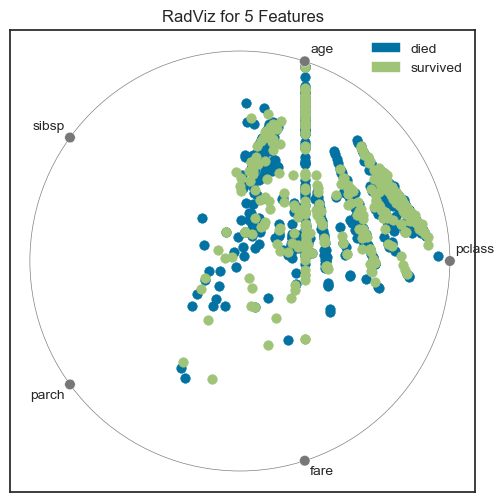

In [40]:
from yellowbrick.features import RadViz

# Filter numeric columns only
X_numeric = X.select_dtypes(include="number")

fig, ax = plt.subplots(figsize=(6, 6))          # Create figure and axis with 6x6 inch dimensions
rv = RadViz(
    classes=["died", "survived"],               # Set class labels for visualization
    features=X_numeric.columns,                 # Use numeric columns only
)
rv.fit(X_numeric, y)                            # Fit the RadViz model to numeric data
_ = rv.transform(X_numeric)                     # Transform data (optional)
rv.poof();                                      # Display the visualization

# fig.savefig("images/mlpr_0612.png", dpi=300)  # Optional: Save figure with high DPI

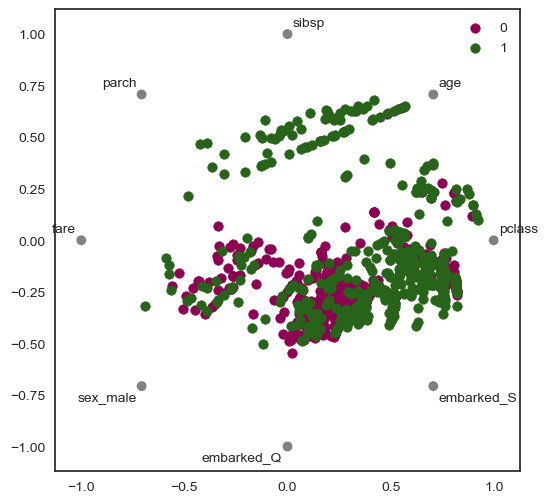

In [41]:
from pandas.plotting import radviz

# Create figure and axis with dimensions 6x6 inches
fig, ax = plt.subplots(figsize=(6, 6))       

# Create a copy of the DataFrame 'X' and add the target column
new_df = X.copy()
new_df["target"] = y

# Ensure that all columns in 'new_df' are numeric; convert boolean columns to integers if any
new_df = new_df.apply(lambda col: col.astype(int) if col.dtype == bool else col)

# Plot the RadViz visualization with a colormap
radviz(
    new_df, "target", ax=ax, colormap="PiYG"
);
# Optional: Save the figure
# fig.savefig("images/mlpr_0613.png", dpi=300)

### Parallel Coordinates

For multivariate data, you can use a parallel coordinates plot to
see clustering visually.

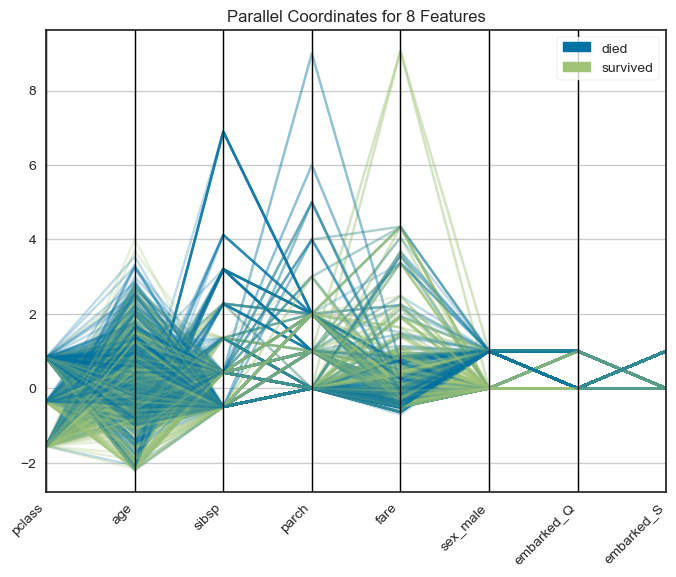

In [44]:
from yellowbrick.features import ParallelCoordinates
from matplotlib.ticker import FixedLocator

fig, ax = plt.subplots(figsize=(8, 6))     # Create figure and axis with dimensions 6x4 inches

# Initialize ParallelCoordinates visualizer with class names and feature labels
pc = ParallelCoordinates(
    classes=["died", "survived"],          # Label classes as 'died' and 'survived'
    features=X.columns,                    # Use columns from 'X' as feature labels
)

pc.fit(X, y)                               # Fit the visualizer to the data
pc.transform(X)                            # Transform data to plot

# Set tick labels on x-axis with rotation for better readability
ax.xaxis.set_major_locator(FixedLocator(range(len(X.columns))))  # Fix number of ticks based on number of features
ax.set_xticklabels(
    X.columns, rotation=45, ha="right"     # Set labels to feature names, rotated 45° for clarity
)

pc.poof();                                 # Display the plot

# Optional: Save the figure with specified resolution
# fig.savefig("images/mlpr_0614.png", dpi=300)

#### Overall Inference:
* Passenger class (lower `pclass`), `fare` (higher), and sex (females surviving more) seem to be the most influential factors in determining survival.
* `Age` also plays a role, with younger passengers more likely to survive.
* Features like `sibsp` and `parch` do not show clear distinctions between survival outcomes.

These patterns reflect some of the real-life circumstances during the Titanic disaster, where women, children, and passengers in first-class had higher survival rates due to prioritization in lifeboat access.

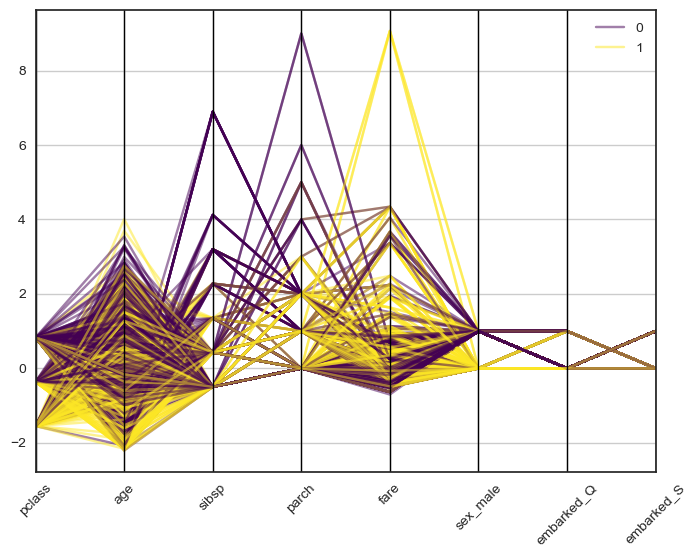

In [46]:
from pandas.plotting import parallel_coordinates  

fig, ax = plt.subplots(figsize=(8, 6))           # Create a new figure and axis with dimensions 8x6 inches
new_df = X.copy()                                # Create a copy of the original features DataFrame 'X'
new_df["target"] = y                             # Add the target variable (survived/died) as a new column in the DataFrame

parallel_coordinates(                            # Create a parallel coordinates plot with the following parameters:
    new_df,                                      # The DataFrame containing the features and target
    "target",                                    # The column specifying the target variable to group by (survived or died)
    ax=ax,                                       # Use the axis 'ax' to plot on
    colormap="viridis",                          # Use the 'viridis' colormap for color representation
    alpha=0.5,                                   # Set transparency of the lines to 50% (makes overlapping lines more distinguishable)
)

ax.set_xticklabels(                              # Rotate the x-axis tick labels for better readability
    ax.get_xticklabels(), rotation=45            # Rotate the labels by 45 degrees
);

# fig.savefig("images/mlpr_0615.png",dpi=300,bbox_inches="tight")  # (Optional) Save the figure as a .png file with 300 dpi resolution